# Movie recommendetion system

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("movies.csv") 
df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [7]:
df1 = pd.read_csv("ratings.csv")
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
#mearging both files movies.csv and ratings.csv
data = pd.merge(df,df1) 
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [9]:
# Calculating mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [10]:
# Calculating count rating of all movies 
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [11]:
Ratings = pd.DataFrame(data.groupby('title')['rating'].mean())  
Ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
Ratings.head() 

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Text(0.5, 0, 'Number Of Ratings')

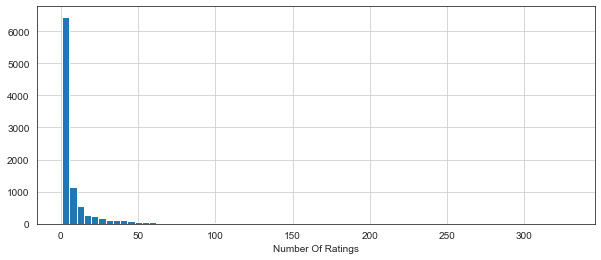

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('white') 
%matplotlib inline 

# ploting graph of 'num of ratings column' 
plt.figure(figsize =(10, 4))   
Ratings['num of ratings'].hist(bins = 70) 
plt.xlabel("Number Of Ratings")

Text(0.5, 0, 'Rating')

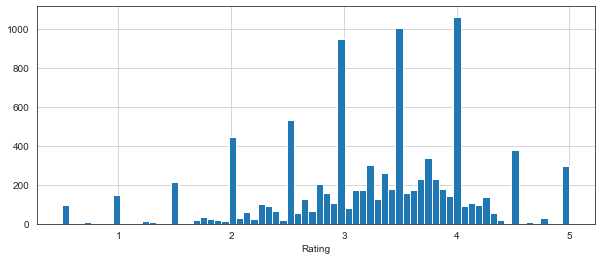

In [13]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
Ratings['rating'].hist(bins = 70)
plt.xlabel("Rating")

In [14]:
Movie = data.pivot_table(index ="userId",columns ='title', values ='rating')   
Movie.head() 
Ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [15]:
# analysing correlation with similar movies 
BatmanForever_user_ratings = Movie['Batman Forever (1995)'] 
WarforthePlanetoftheApes_user_ratings = Movie['War for the Planet of the Apes (2017)']
BatmanForever_user_ratings.head() 

userId
1    NaN
2    NaN
3    NaN
4    NaN
5    3.0
Name: Batman Forever (1995), dtype: float64

In [16]:
# analysing correlation with similar movies 
similar_to_BatmanForever = Movie.corrwith(BatmanForever_user_ratings) 
similar_to_WarforthePlanetoftheApes = Movie.corrwith(WarforthePlanetoftheApes_user_ratings) 
  
corr_BatmanForever = pd.DataFrame(similar_to_BatmanForever, columns =['Correlation']) 
corr_BatmanForever.dropna(inplace = True) 
corr_BatmanForever.head() 

C:\Users\ravik\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ravik\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",-0.169125
(500) Days of Summer (2009),0.263569
*batteries not included (1987),-1.000000
10 Cloverfield Lane (2016),1.000000
10 Things I Hate About You (1999),0.595994


In [13]:
# Similar movies like Batman Forever 
corr_BatmanForever.sort_values('Correlation', ascending = False).head(10) 
corr_BatmanForever = corr_BatmanForever.join(Ratings['num of ratings'])   
corr_BatmanForever.head()
print("Movies Similer like Batman Forever")
corr_BatmanForever[corr_BatmanForever['num of ratings']>100].sort_values('Correlation', ascending = False).head()

Movies Similer like Batman Forever


,Correlation,num of ratings
title,,
Batman Forever (1995),1.000000,137
Outbreak (1995),0.538997,101
Full Metal Jacket (1987),0.525268,102
Finding Nemo (2003),0.516633,141
Shrek (2001),0.488341,170


In [14]:
# Similar movies like War for the Planet of the Apes
corr_WarforthePlanetoftheApes = pd.DataFrame(similar_to_WarforthePlanetoftheApes, columns =['Correlation']) 
corr_WarforthePlanetoftheApes.dropna(inplace = True) 
corr_WarforthePlanetoftheApes = corr_WarforthePlanetoftheApes.join(Ratings['num of ratings']) 
print("Movies Similer like War for the Planet of the Apes")
corr_WarforthePlanetoftheApes[corr_WarforthePlanetoftheApes['num of ratings']>100].sort_values('Correlation', ascending = False).head()


Movies Similer like War for the Planet of the Apes


,Correlation,num of ratings
title,,
2001: A Space Odyssey (1968),1.0,109
Goodfellas (1990),1.0,126
Star Wars: Episode I - The Phantom Menace (1999),1.0,140
Full Metal Jacket (1987),1.0,102
Speed (1994),1.0,171
